In [251]:
grammar_1 = """
句子 => 人称 状语 动词 人称 动作
人称 => 人称 和 人称 | 特朗普 | 奥特曼 |海绵宝宝 | 杨超越 | 艾莉亚 |小恶魔
状语 => 悄悄地 | 静静地 | 若无其事地 | 大言不惭地 | 一脸无辜地 | 满脸痴汉笑地 | 在山上 |在海底 |在月球 |惊恐地
动词 => 看着 | 说着 | 听着 | 直播 | 瞪着 | 想着 |等着 |计划着
动作 => 尬舞 | 说瞎话 | 加班 | 做蟹黄堡 | 舞剑 | 吃瓜 |慢慢膨胀 |上天 |撕下人皮面具
"""

In [262]:
grammar_2 = """
句子 => 时间 的 地点 景致 ， 形容词 人称 地点状语 动作
时间 => 数字 月份 | 春天 |秋天 |夏天| 冬天
数字 => 1|2|3|4|5|6|7|8|9|10|11|12
地点 => 奈良 | 新德里 | 巴塞罗那 |乌鲁木齐 |蟹堡王 |太湖
景致 => 鲜花盛开 | 秋高气爽 |万里无云 |人头攒动 |生机勃勃| 瓜果成熟
形容词 => null | 开心的 |三五成群的 | 年轻的 |幸福的
人称 => 游人 | 渔夫 |沙雕网友 | 一家人 |当地居民 |外星人|马里奥
地点状语 => 在树下 |在山上 |在塔上 |在下水道里 |在屋顶上 |在草地上|田地里
动作 => 看日出 |看日落 |赏花 |喂小鹿|赏花|野餐 |修水管
"""

In [253]:
def create_grammar(grammar_str, split='=>', line_split = '\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp,stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [254]:
import random

In [255]:
choice = random.choice

In [207]:
def generate(gram, target):
    if target in gram:
        new_expanded = choice(gram[target])
        return ''.join(generate(gram,t) for t in new_expanded if t!= 'null')
    else: return target

In [211]:
def generate_n(gram,target,n):
    sentence = []
    for i in range(n):
        sentence.append(generate(gram,target))
    return sentence

In [212]:
sentence = generate_n(gram = create_grammar(grammar_1),target = '句子',n=10)

In [213]:
sentence

['特朗普和特朗普满脸痴汉笑地想着艾莉亚吃瓜',
 '奥特曼静静地看着特朗普尬舞',
 '奥特曼大言不惭地直播奥特曼吃瓜',
 '艾莉亚一脸无辜地直播海绵宝宝说瞎话',
 '艾莉亚若无其事地等着奥特曼加班',
 '艾莉亚若无其事地看着杨超越和艾莉亚做蟹黄堡',
 '艾莉亚大张旗鼓地想着特朗普和奥特曼做蟹黄堡',
 '海绵宝宝一脸无辜地直播杨超越尬舞',
 '奥特曼一脸无辜地看着艾莉亚说瞎话',
 '海绵宝宝静静地直播海绵宝宝吃瓜']

In [2]:
filename = 'D:/jupyter_notebook/source/douban.txt'

In [3]:
import pandas as pd

In [4]:
content = pd.read_csv(filename,encoding='gb18030')

C:\Users\xiaog\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
content.head()

,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2
3,4,https://movie.douban.com/subject/26363254/,战狼2,凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。,4
4,5,https://movie.douban.com/subject/26363254/,战狼2,中二得很,1


In [6]:
articles = content['comment'].tolist()

In [7]:
len(articles)

261497

In [8]:
import re

In [9]:
def token(string):
    return re.findall('\w',string)

In [10]:
from collections import Counter

In [11]:
import jieba

In [28]:
with_jieba_cut = Counter(jieba.cut(articles[1]))

In [13]:
articles_clean = [''.join(token(str(a))) for a in articles]

In [15]:
len(articles_clean)

261497

In [16]:
with open('articles.txt','w') as f:
    for a in articles_clean:
        f.write(a+'\n')

In [18]:
def cut(string):return list(jieba.cut(string))

In [19]:
TOKEN = []

In [162]:
for i,line in enumerate((open('articles.txt'))):
    if i>180000:break
    TOKEN += cut(line)

In [163]:
words_count = Counter(TOKEN)

In [164]:
frequiences = [f for w, f in words_count.most_common(1000)]

In [165]:
x = [i for i in range(1000)]

In [166]:
%matplotlib inline

In [167]:
import matplotlib.pyplot as plt

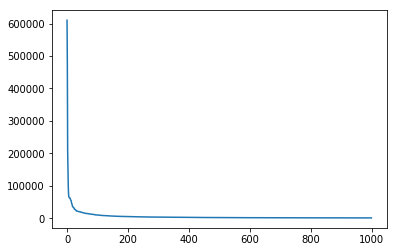

In [168]:
plt.plot(x,frequiences)

In [169]:
import numpy as np

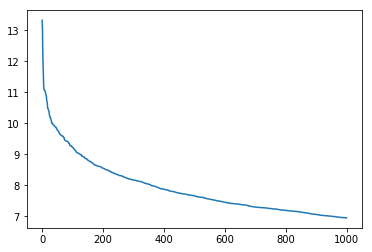

In [170]:
plt.plot(x, np.log(frequiences))

In [171]:
def prob_1(word):
    return words_count[word]/len(TOKEN)

In [175]:
TOKEN = [str(t) for t in TOKEN]

In [176]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [177]:
TOKEN_2_GRAM[:10]

['吴京意淫', '意淫到', '到了', '了脑残', '脑残的', '的地步', '地步看', '看了', '了恶心', '恶心想']

In [143]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [144]:
def prob_1(word):return words_count[word]/len(TOKEN)

In [145]:
def prob_2(word1,word2):
    if word1+word2 in words_count_2:return words_count_2[word1+word2]/len(TOKEN)
    else: return 1/len(TOKEN_2_GRAM)

In [180]:
def get_probablity(sentence):
    words = cut(sentence)
    sentence_pro = 1
    for i,word in enumerate(words[:-1]):
        next_ = words[i+1]
        probability = prob_2(word,next_)
        sentence_pro *= probability
    return sentence_pro

In [223]:
probs = []
for s in sentence:
    prob = get_probablity(s)
    probs.append((s,prob))

In [224]:
probs

[('特朗普和特朗普满脸痴汉笑地想着艾莉亚吃瓜', 1.8094353217392057e-62),
 ('奥特曼静静地看着特朗普尬舞', 5.896036504812912e-34),
 ('奥特曼大言不惭地直播奥特曼吃瓜', 1.4740097633805096e-35),
 ('艾莉亚一脸无辜地直播海绵宝宝说瞎话', 1.721474144419663e-49),
 ('艾莉亚若无其事地等着奥特曼加班', 3.902710427874287e-39),
 ('艾莉亚若无其事地看着杨超越和艾莉亚做蟹黄堡', 8.690817251752993e-70),
 ('艾莉亚大张旗鼓地想着特朗普和奥特曼做蟹黄堡', 2.0104841253622022e-63),
 ('海绵宝宝一脸无辜地直播杨超越尬舞', 2.01048369082134e-62),
 ('奥特曼一脸无辜地看着艾莉亚说瞎话', 6.371773504320412e-42),
 ('海绵宝宝静静地直播海绵宝宝吃瓜', 1.5929437203748576e-42)]

In [228]:
sorted(probs,key = lambda x:x[1],reverse =True)

[('奥特曼静静地看着特朗普尬舞', 5.896036504812912e-34),
 ('奥特曼大言不惭地直播奥特曼吃瓜', 1.4740097633805096e-35),
 ('艾莉亚若无其事地等着奥特曼加班', 3.902710427874287e-39),
 ('奥特曼一脸无辜地看着艾莉亚说瞎话', 6.371773504320412e-42),
 ('海绵宝宝静静地直播海绵宝宝吃瓜', 1.5929437203748576e-42),
 ('艾莉亚一脸无辜地直播海绵宝宝说瞎话', 1.721474144419663e-49),
 ('海绵宝宝一脸无辜地直播杨超越尬舞', 2.01048369082134e-62),
 ('特朗普和特朗普满脸痴汉笑地想着艾莉亚吃瓜', 1.8094353217392057e-62),
 ('艾莉亚大张旗鼓地想着特朗普和奥特曼做蟹黄堡', 2.0104841253622022e-63),
 ('艾莉亚若无其事地看着杨超越和艾莉亚做蟹黄堡', 8.690817251752993e-70)]

In [243]:
def generate_best(gram,target,n):
    sentence = generate_n(gram,target,n)
    probs = []
    for s in sentence:
        prob = get_probablity(s)
        probs.append((s,prob))
    result = sorted(probs,key = lambda x:x[1],reverse =True)
    best = result[0]
    print('The best sentense is:'+best[0])
    for item in result: print(item)

In [264]:
generate_best(gram = create_grammar(grammar_1),target = '句子',n= 100)

The best sentense is:奥特曼悄悄地看着艾莉亚尬舞
('奥特曼悄悄地看着艾莉亚尬舞', 1.3639557724172307e-28)
('特朗普悄悄地看着艾莉亚加班', 1.3639557724172307e-28)
('奥特曼若无其事地看着特朗普上天', 5.896037779167338e-35)
('奥特曼若无其事地看着奥特曼上天', 5.896037779167338e-35)
('奥特曼在月球想着奥特曼舞剑', 1.4740097633805096e-35)
('艾莉亚静静地听着小恶魔说瞎话', 4.078442140132315e-37)
('奥特曼大言不惭地说着艾莉亚上天', 4.8935209936448205e-39)
('奥特曼若无其事地说着奥特曼加班', 4.8935209936448205e-39)
('奥特曼惊恐地等着艾莉亚尬舞', 3.902710427874287e-39)
('奥特曼若无其事地听着特朗普加班', 2.0230380876217314e-40)
('海绵宝宝静静地直播小恶魔舞剑', 7.646126552570031e-41)
('艾莉亚在海底直播小恶魔舞剑', 7.646126552570031e-41)
('杨超越静静地看着特朗普尬舞', 6.371772127141693e-41)
('奥特曼在月球想着小恶魔加班', 1.9115320512961242e-41)
('特朗普静静地瞪着杨超越上天', 1.911532051296124e-41)
('艾莉亚大言不惭地瞪着海绵宝宝尬舞', 1.5929433760801033e-41)
('杨超越大言不惭地直播艾莉亚尬舞', 1.5929437203748576e-42)
('奥特曼在海底想着杨超越加班', 1.5929437203748576e-42)
('奥特曼惊恐地想着海绵宝宝加班', 1.5929437203748576e-42)
('杨超越大言不惭地想着艾莉亚加班', 1.5929437203748576e-42)
('特朗普在山上直播海绵宝宝说瞎话', 1.5929437203748576e-42)
('杨超越若无其事地说着特朗普上天', 5.288366285628717e-46)
('海绵宝宝悄悄地说着奥特曼尬舞', 1.10174

In [263]:
generate_best(gram = create_grammar(grammar_2),target = '句子',n=100)

The best sentense is:夏天的巴塞罗那生机勃勃，马里奥在树下修水管
('夏天的巴塞罗那生机勃勃，马里奥在树下修水管', 7.961513694871062e-61)
('冬天的太湖鲜花盛开，渔夫田地里赏花', 3.2167732100489134e-62)
('冬天的太湖秋高气爽，马里奥在草地上赏花', 3.216772514783833e-62)
('夏天的太湖万里无云，年轻的外星人田地里野餐', 2.254223204315376e-65)
('夏天的乌鲁木齐生机勃勃，开心的外星人田地里野餐', 1.6261381130366645e-65)
('春天的新德里人头攒动，年轻的游人在树下野餐', 3.75703867385896e-66)
('夏天的新德里秋高气爽，幸福的马里奥在山上赏花', 2.9396683000329744e-66)
('冬天的太湖人头攒动，幸福的游人田地里野餐', 1.781617151535136e-67)
('2月份的奈良秋高气爽，当地居民在树下赏花', 5.214489224005275e-69)
('秋天的巴塞罗那瓜果成熟，游人在塔上赏花', 5.214488096959001e-69)
('冬天的乌鲁木齐万里无云，沙雕网友在塔上野餐', 3.4763253979726666e-69)
('冬天的乌鲁木齐瓜果成熟，渔夫在草地上赏花', 3.4763253979726666e-69)
('春天的新德里生机勃勃，沙雕网友田地里修水管', 2.3899747442320733e-69)
('3月份的太湖秋高气爽，沙雕网友田地里赏花', 1.303622587762949e-69)
('夏天的乌鲁木齐生机勃勃，年轻的外星人在屋顶上赏花', 6.431327614258578e-70)
('8月份的太湖秋高气爽，外星人田地里修水管', 2.172704782541066e-70)
('5月份的太湖瓜果成熟，游人在山上赏花', 2.172704782541066e-70)
('春天的新德里万里无云，开心的一家人在草地上野餐', 4.842463887210657e-71)
('夏天的太湖鲜花盛开，开心的游人在树下野餐', 7.029386100706487e-72)
('春天的乌鲁木齐生机勃勃，幸福的外星人在草地上赏花', 5